# 用前七天天气预测下一天天气 
# 数据科学用工程导论大作业
# 秦鑫成 10235501453

# 1.读入CSV文件，并在每个CSV文件末端新增2行，分別年份、月份、并加入四季特征。

In [81]:
import pandas as pd
import os
import numpy as np

In [82]:
wheather_data = ('./天气数据')

In [83]:
data_list = []
month = 0
year = 2012
for i in os.listdir(wheather_data): 
    df = pd.read_csv(wheather_data+"/"+i)
    month = month + 1
    if month > 12:                             
        year = year + 1
        month = 1       
    df['year'] = year             ##新增年份/月份
    df['month'] = month
    if month == 11 or month == 12 or month ==1 :
        df['winter'] = 1
    else :
        df['winter'] = 0
    if month == 2 or month == 3 or month ==4 :
        df['spring'] = 1
    else :
        df['spring'] = 0
    if month == 5 or month == 6 or month ==7 :
        df['summer'] = 1
    else :
        df['summer'] = 0
    if month == 8 or month == 9 or month ==10 :
        df['fall'] = 1
    else :
        df['fall'] = 0

    data_list.append(df)
    
data = pd.concat(data_list)  ##合并数据


#### 查看是否成功加入欄位

In [84]:
data.head(2000)      

ObsTime  StnPres SeaPres StnPresMax    StnPresMaxTime StnPresMin  \
0         1   1017.9     ...     1020.5  2012-01-01 09:09     1015.8   
1         2   1017.1     ...     1018.7  2012-01-02 08:49     1016.1   
2         3   1017.0     ...     1018.6  2012-01-03 21:33     1015.2   
3         4   1020.1     ...     1022.8  2012-01-04 09:34     1018.3   
4         5   1019.3     ...     1022.1  2012-01-05 09:54     1017.3   
5         6   1018.6     ...     1020.3  2012-01-06 20:48     1016.7   
6         7   1019.7     ...     1020.9  2012-01-07 10:03     1018.6   
7         8   1019.6     ...     1021.5  2012-01-08 09:02     1017.7   
8         9   1018.4     ...     1020.3  2012-01-09 09:24     1016.2   
9        10   1018.0     ...     1019.5  2012-01-10 09:35     1016.1   
10       11   1019.7     ...     1021.4  2012-01-11 09:46     1018.4   
11       12   1018.7     ...     1020.8  2012-01-12 09:17     1016.5   
12       13   1016.7     ...     1019.2  2012-01-13 09:37     1014.3   
13       14   1012.5     ...     1014.9  2012-01-14 08:52     1010.2   
14       15   1007.9     ...     1011.5  2012-01-15 00:02     1005.1   
15       16   1009.6     ...       1012  2012-01-16 20:33     1007.9   
16       17   1011.8     ...     1013.5  2012-01-17 09:16     1009.9   
17       18   1011.7     ...     1013.9  2012-01-18 09:16     1010.1   
18       19   1012.2     ...     1014.3  2012-01-19 09:01     1010.8   
19       20   1012.4     ...     1014.9  2012-01-20 09:10     1010.5   
20       21   1012.3     ...     1014.2  2012-01-21 11:04       1011   
21       22   1013.9     ...     1015.7  2012-01-22 10:16     1012.3   
22       23   1015.8     ...     1017.7  2012-01-23 09:01     1013.5   
23       24   1014.4     ...       1017  2012-01-24 09:48     1011.7   
24       25   1015.8     ...     1017.6  2012-01-25 10:34     1013.9   
25       26   1016.8     ...       1019  2012-01-26 09:04     1014.8   
26       27   1014.4     ...     1016.7  2012-01-27 09:01     1012.4   
27       28   1013.3     ...     1016.1  2012-01-28 10:01     1011.3   
28       29   1014.5     ...     1016.5  2012-01-29 10:02     1012.6   
29       30   1016.1     ...     1017.7  2012-01-30 22:53     1014.3   
..      ...      ...     ...        ...               ...        ...   
23       24   1004.3     ...     1005.5  2017-05-24 21:03     1002.7   
24       25   1005.2     ...     1007.5  2017-05-25 21:02     1003.3   
25       26   1006.6     ...     1007.7  2017-05-26 11:31     1005.2   
26       27   1006.6     ...       1008  2017-05-27 10:02     1005.5   
27       28   1006.2     ...     1007.4  2017-05-28 22:21     1004.9   
28       29   1006.9     ...     1008.4  2017-05-29 09:42       1005   
29       30   1007.1     ...     1008.9  2017-05-30 11:03     1005.2   
30       31   1003.9     ...     1006.5  2017-05-31 08:21     1001.8   
0         1   1001.9     ...     1003.4  2017-06-01 09:42     1000.1   
1         2   1001.4     ...     1004.8  2017-06-02 21:22      999.9   
2         3   1001.9     ...     1003.6  2017-06-03 08:51     1000.2   
3         4   1004.1     ...     1006.4  2017-06-04 22:25     1002.1   
4         5   1006.7     ...     1008.7  2017-06-05 22:53     1005.3   
5         6   1008.4     ...     1009.4  2017-06-06 07:34     1006.8   
6         7   1008.7     ...     1010.2  2017-06-07 07:13     1006.7   
7         8   1008.9     ...     1010.3  2017-06-08 09:06     1007.1   
8         9   1008.2     ...     1009.1  2017-06-09 00:01     1006.7   
9        10   1006.9     ...     1008.9  2017-06-10 00:01     1005.3   
10       11   1005.7     ...     1007.2  2017-06-11 20:35     1003.9   
11       12   1006.5     ...       1009  2017-06-12 22:57     1004.3   
12       13   1006.9     ...     1008.7  2017-06-13 00:01     1005.2   
13       14   1007.1     ...     1008.7  2017-06-14 09:02     1005.2   
14       15   1006.5     ...     1008.1  2017-06-15 09:38     1005.3   
15       16   1004.8     ...     1006.8  201

## 2.删除不要的行

In [85]:
data = data.drop(['SeaPres','Td dew point','PrecpHour','PrecpMax10','PrecpMax10Time','PrecpHrMax','PrecpHrMaxTime',
                  'SunShine', 'SunShineRate', 'GloblRad', 'VisbMean', 'EvapA' , 'UVI Max', 'UVI Max Time', 'Cloud Amount'
                  ,'StnPresMaxTime','StnPresMinTime','T Max Time','T Min Time','RHMinTime','WGustTime'],axis = 1)

data.tail()

ObsTime  StnPres StnPresMax StnPresMin  Temperature T Max T Min  RH RHMin  \
25       26   1014.8     1016.9     1012.7         22.4  25.0  20.8  95    75   
26       27   1014.3     1015.6     1013.0         22.7  26.8  20.0  93    70   
27       28   1014.4     1016.5     1012.5         23.2  27.6  19.7  85    58   
28       29   1014.7     1016.8     1013.1         23.6  26.8  20.1  97    84   
29       30   1013.9     1016.0     1011.6         24.5  27.9  20.9  87    47   

     WS  WD WSGust WDGust  Precp  year  month  winter  spring  summer  fall  
25  1.9  38   10.0     18    0.0  2020      4       0       1       0     0  
26  1.2  47    5.5     71    0.0  2020      4       0       1       0     0  
27  2.2  43   11.5     10    0.0  2020      4       0       1       0     0  
28  1.2  43    7.2     10    0.0  2020      4       0       1       0     0  
29  1.0   5    6.6    346    0.0  2020      4       0       1       0     0

## 3.重新排序，增加可读性。

In [86]:
data = data[['year','month','ObsTime','spring','summer','fall','winter','StnPres','StnPresMax',
             'StnPresMin','Temperature','T Max','T Min','RH','RHMin','WS','WD','WSGust','WDGust','Precp']]
data.tail()
data.to_csv(r'weather.csv', index = False)

df = pd.read_csv('weather.csv', sep=',', 
                 parse_dates={'dt' : ['year', 'month','ObsTime']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
data.to_csv(r'weather.csv', index = False)
df.head()

spring  summer  fall  winter  StnPres StnPresMax StnPresMin  \
dt                                                                        
2012-01-01       0       0     0       1   1017.9     1020.5     1015.8   
2012-01-02       0       0     0       1   1017.1     1018.7     1016.1   
2012-01-03       0       0     0       1   1017.0     1018.6     1015.2   
2012-01-04       0       0     0       1   1020.1     1022.8     1018.3   
2012-01-05       0       0     0       1   1019.3     1022.1     1017.3   

            Temperature T Max T Min  RH RHMin   WS  WD WSGust WDGust  Precp  
dt                                                                           
2012-01-01         16.7  19.9  14.4  71    60  4.9  44   13.9     48    0.0  
2012-01-02         16.4  19.4  14.6  68    54  3.7  41    8.4     46    0.0  
2012-01-03         16.8  22.7  13.1  78    60  2.9  41   10.7     45    0.0  
2012-01-04         12.1  15.2  10.9  75    69  6.9  44   15.4     45    0.0  
2012-01-05         12.7  14.7  11.0  88    73  4.3  43   12.3     38    2.5

## 4.检查/移除缺失值

In [87]:
df = df.replace('...', np.nan) 
df = df.replace('/', np.nan) 
df = df.replace('X',np.nan)

In [88]:
df.isnull().sum(axis=0)

spring          0
summer          0
fall            0
winter          0
StnPres         0
StnPresMax     40
StnPresMin     40
Temperature     0
T Max          40
T Min          40
RH             94
RHMin          40
WS              0
WD              0
WSGust         40
WDGust         40
Precp           0
dtype: int64

In [89]:
df.dropna(
    axis=0,     
    how='any',   
    inplace=True)

In [90]:
df.isnull().sum(axis=0)   ##再次检查

spring         0
summer         0
fall           0
winter         0
StnPres        0
StnPresMax     0
StnPresMin     0
Temperature    0
T Max          0
T Min          0
RH             0
RHMin          0
WS             0
WD             0
WSGust         0
WDGust         0
Precp          0
dtype: int64

In [91]:
df.head()

spring  summer  fall  winter  StnPres StnPresMax StnPresMin  \
dt                                                                        
2012-01-01       0       0     0       1   1017.9     1020.5     1015.8   
2012-01-02       0       0     0       1   1017.1     1018.7     1016.1   
2012-01-03       0       0     0       1   1017.0     1018.6     1015.2   
2012-01-04       0       0     0       1   1020.1     1022.8     1018.3   
2012-01-05       0       0     0       1   1019.3     1022.1     1017.3   

            Temperature T Max T Min  RH RHMin   WS  WD WSGust WDGust  Precp  
dt                                                                           
2012-01-01         16.7  19.9  14.4  71    60  4.9  44   13.9     48    0.0  
2012-01-02         16.4  19.4  14.6  68    54  3.7  41    8.4     46    0.0  
2012-01-03         16.8  22.7  13.1  78    60  2.9  41   10.7     45    0.0  
2012-01-04         12.1  15.2  10.9  75    69  6.9  44   15.4     45    0.0  
2012-01-05         12.7  14.7  11.0  88    73  4.3  43   12.3     38    2.5

In [92]:
data.to_csv(r'weather.csv', index = False)  ##將修改后的数据保存成csv文件

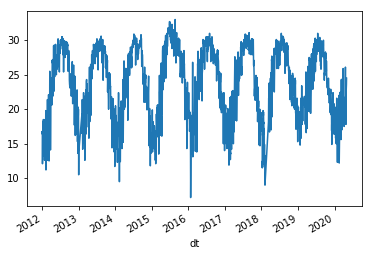

In [93]:
df.Temperature.plot() ##每日气温折线图

In [94]:
list(df.columns)

['spring',
 'summer',
 'fall',
 'winter',
 'StnPres',
 'StnPresMax',
 'StnPresMin',
 'Temperature',
 'T Max',
 'T Min',
 'RH',
 'RHMin',
 'WS',
 'WD',
 'WSGust',
 'WDGust',
 'Precp']

In [96]:
df.shape

(2909, 17)

In [98]:
col = list(df.columns)

length =7 
for i in range(length, 0, -1):
    for col1 in col:
        df[col1+'(t'+str(-i)+')'] = df[col1].shift(i)

da = df  
df.head()

spring  summer  fall  winter  StnPres StnPresMax StnPresMin  \
dt                                                                        
2012-01-01       0       0     0       1   1017.9     1020.5     1015.8   
2012-01-02       0       0     0       1   1017.1     1018.7     1016.1   
2012-01-03       0       0     0       1   1017.0     1018.6     1015.2   
2012-01-04       0       0     0       1   1020.1     1022.8     1018.3   
2012-01-05       0       0     0       1   1019.3     1022.1     1017.3   

            Temperature T Max T Min       ...        Temperature(t-1)(t-1)  \
dt                                        ...                                
2012-01-01         16.7  19.9  14.4       ...                          NaN   
2012-01-02         16.4  19.4  14.6       ...                          NaN   
2012-01-03         16.8  22.7  13.1       ...                         16.7   
2012-01-04         12.1  15.2  10.9       ...                         16.4   
2012-01-05         12.7  14.7  11.0       ...                         16.8   

           T Max(t-1)(t-1)  T Min(t-1)(t-1)  RH(t-1)(t-1) RHMin(t-1)(t-1)  \
dt                                                                          
2012-01-01             NaN              NaN           NaN             NaN   
2012-01-02             NaN              NaN           NaN             NaN   
2012-01-03            19.9             14.4            71              60   
2012-01-04            19.4             14.6            68              54   
2012-01-05            22.7             13.1            78              60   

           WS(t-1)(t-1)  WD(t-1)(t-1)  WSGust(t-1)(t-1)  WDGust(t-1)(t-1)  \
dt                                                                          
2012-01-01          NaN           NaN               NaN               NaN   
2012-01-02          NaN           NaN               NaN               NaN   
2012-01-03          4.9          44.0              13.9                48   
2012-01-04          3.7          41.0               8.4                46   
2012-01-05          2.9          41.0              10.7                45   

            Precp(t-1)(t-1)  
dt                           
2012-01-01              NaN  
2012-01-02              NaN  
2012-01-03              0.0  
2012-01-04              0.0  
2012-01-05              0.0  

[5 rows x 969 columns]

In [18]:
df.shape

(2909, 136)

In [19]:
col1 = list(df.columns)
col1

['spring',
 'summer',
 'fall',
 'winter',
 'StnPres',
 'StnPresMax',
 'StnPresMin',
 'Temperature',
 'T Max',
 'T Min',
 'RH',
 'RHMin',
 'WS',
 'WD',
 'WSGust',
 'WDGust',
 'Precp',
 'spring(t-7)',
 'summer(t-7)',
 'fall(t-7)',
 'winter(t-7)',
 'StnPres(t-7)',
 'StnPresMax(t-7)',
 'StnPresMin(t-7)',
 'Temperature(t-7)',
 'T Max(t-7)',
 'T Min(t-7)',
 'RH(t-7)',
 'RHMin(t-7)',
 'WS(t-7)',
 'WD(t-7)',
 'WSGust(t-7)',
 'WDGust(t-7)',
 'Precp(t-7)',
 'spring(t-6)',
 'summer(t-6)',
 'fall(t-6)',
 'winter(t-6)',
 'StnPres(t-6)',
 'StnPresMax(t-6)',
 'StnPresMin(t-6)',
 'Temperature(t-6)',
 'T Max(t-6)',
 'T Min(t-6)',
 'RH(t-6)',
 'RHMin(t-6)',
 'WS(t-6)',
 'WD(t-6)',
 'WSGust(t-6)',
 'WDGust(t-6)',
 'Precp(t-6)',
 'spring(t-5)',
 'summer(t-5)',
 'fall(t-5)',
 'winter(t-5)',
 'StnPres(t-5)',
 'StnPresMax(t-5)',
 'StnPresMin(t-5)',
 'Temperature(t-5)',
 'T Max(t-5)',
 'T Min(t-5)',
 'RH(t-5)',
 'RHMin(t-5)',
 'WS(t-5)',
 'WD(t-5)',
 'WSGust(t-5)',
 'WDGust(t-5)',
 'Precp(t-5)',
 'spring(t-4)

In [20]:
df.isnull().sum(axis=0)

spring              0
summer              0
fall                0
winter              0
StnPres             0
StnPresMax          0
StnPresMin          0
Temperature         0
T Max               0
T Min               0
RH                  0
RHMin               0
WS                  0
WD                  0
WSGust              0
WDGust              0
Precp               0
spring(t-7)         7
summer(t-7)         7
fall(t-7)           7
winter(t-7)         7
StnPres(t-7)        7
StnPresMax(t-7)     7
StnPresMin(t-7)     7
Temperature(t-7)    7
T Max(t-7)          7
T Min(t-7)          7
RH(t-7)             7
RHMin(t-7)          7
WS(t-7)             7
                   ..
StnPres(t-2)        2
StnPresMax(t-2)     2
StnPresMin(t-2)     2
Temperature(t-2)    2
T Max(t-2)          2
T Min(t-2)          2
RH(t-2)             2
RHMin(t-2)          2
WS(t-2)             2
WD(t-2)             2
WSGust(t-2)         2
WDGust(t-2)         2
Precp(t-2)          2
spring(t-1)         1
summer(t-1

In [21]:
df.dropna(
    axis=0,     
    how='any',   
    inplace=True)
df.isnull().sum(axis=0)

spring              0
summer              0
fall                0
winter              0
StnPres             0
StnPresMax          0
StnPresMin          0
Temperature         0
T Max               0
T Min               0
RH                  0
RHMin               0
WS                  0
WD                  0
WSGust              0
WDGust              0
Precp               0
spring(t-7)         0
summer(t-7)         0
fall(t-7)           0
winter(t-7)         0
StnPres(t-7)        0
StnPresMax(t-7)     0
StnPresMin(t-7)     0
Temperature(t-7)    0
T Max(t-7)          0
T Min(t-7)          0
RH(t-7)             0
RHMin(t-7)          0
WS(t-7)             0
                   ..
StnPres(t-2)        0
StnPresMax(t-2)     0
StnPresMin(t-2)     0
Temperature(t-2)    0
T Max(t-2)          0
T Min(t-2)          0
RH(t-2)             0
RHMin(t-2)          0
WS(t-2)             0
WD(t-2)             0
WSGust(t-2)         0
WDGust(t-2)         0
Precp(t-2)          0
spring(t-1)         0
summer(t-1

In [22]:
list(df.columns)

['spring',
 'summer',
 'fall',
 'winter',
 'StnPres',
 'StnPresMax',
 'StnPresMin',
 'Temperature',
 'T Max',
 'T Min',
 'RH',
 'RHMin',
 'WS',
 'WD',
 'WSGust',
 'WDGust',
 'Precp',
 'spring(t-7)',
 'summer(t-7)',
 'fall(t-7)',
 'winter(t-7)',
 'StnPres(t-7)',
 'StnPresMax(t-7)',
 'StnPresMin(t-7)',
 'Temperature(t-7)',
 'T Max(t-7)',
 'T Min(t-7)',
 'RH(t-7)',
 'RHMin(t-7)',
 'WS(t-7)',
 'WD(t-7)',
 'WSGust(t-7)',
 'WDGust(t-7)',
 'Precp(t-7)',
 'spring(t-6)',
 'summer(t-6)',
 'fall(t-6)',
 'winter(t-6)',
 'StnPres(t-6)',
 'StnPresMax(t-6)',
 'StnPresMin(t-6)',
 'Temperature(t-6)',
 'T Max(t-6)',
 'T Min(t-6)',
 'RH(t-6)',
 'RHMin(t-6)',
 'WS(t-6)',
 'WD(t-6)',
 'WSGust(t-6)',
 'WDGust(t-6)',
 'Precp(t-6)',
 'spring(t-5)',
 'summer(t-5)',
 'fall(t-5)',
 'winter(t-5)',
 'StnPres(t-5)',
 'StnPresMax(t-5)',
 'StnPresMin(t-5)',
 'Temperature(t-5)',
 'T Max(t-5)',
 'T Min(t-5)',
 'RH(t-5)',
 'RHMin(t-5)',
 'WS(t-5)',
 'WD(t-5)',
 'WSGust(t-5)',
 'WDGust(t-5)',
 'Precp(t-5)',
 'spring(t-4)

In [23]:
df.head(2000)

spring  summer  fall  winter  StnPres StnPresMax StnPresMin  \
dt                                                                        
2012-01-08       0       0     0       1   1019.6     1021.5     1017.7   
2012-01-09       0       0     0       1   1018.4     1020.3     1016.2   
2012-01-10       0       0     0       1   1018.0     1019.5     1016.1   
2012-01-11       0       0     0       1   1019.7     1021.4     1018.4   
2012-01-12       0       0     0       1   1018.7     1020.8     1016.5   
2012-01-13       0       0     0       1   1016.7     1019.2     1014.3   
2012-01-14       0       0     0       1   1012.5     1014.9     1010.2   
2012-01-15       0       0     0       1   1007.9     1011.5     1005.1   
2012-01-16       0       0     0       1   1009.6     1012.0     1007.9   
2012-01-17       0       0     0       1   1011.8     1013.5     1009.9   
2012-01-18       0       0     0       1   1011.7     1013.9     1010.1   
2012-01-19       0       0     0       1   1012.2     1014.3     1010.8   
2012-01-20       0       0     0       1   1012.4     1014.9     1010.5   
2012-01-21       0       0     0       1   1012.3     1014.2     1011.0   
2012-01-22       0       0     0       1   1013.9     1015.7     1012.3   
2012-01-23       0       0     0       1   1015.8     1017.7     1013.5   
2012-01-24       0       0     0       1   1014.4     1017.0     1011.7   
2012-01-25       0       0     0       1   1015.8     1017.6     1013.9   
2012-01-26       0       0     0       1   1016.8     1019.0     1014.8   
2012-01-27       0       0     0       1   1014.4     1016.7     1012.4   
2012-01-28       0       0     0       1   1013.3     1016.1     1011.3   
2012-01-29       0       0     0       1   1014.5     1016.5     1012.6   
2012-01-30       0       0     0       1   1016.1     1017.7     1014.3   
2012-01-31       0       0     0       1   1017.2     1019.3     1014.9   
2012-02-01       1       0     0       0   1016.4     1018.3     1014.6   
2012-02-02       1       0     0       0   1017.4     1019.5     1015.9   
2012-02-03       1       0     0       0   1018.6     1020.5     1017.7   
2012-02-04       1       0     0       0   1016.7     1019.6     1013.9   
2012-02-05       1       0     0       0   1014.5     1016.8     1011.7   
2012-02-06       1       0     0       0   1008.9     1011.8     1005.8   
...            ...     ...   ...     ...      ...        ...        ...   
2017-07-25       0       1     0       0   1003.2     1004.3     1001.7   
2017-07-26       0       1     0       0   1002.5     1003.7     1001.4   
2017-07-27       0       1     0       0   1002.4     1004.2     1000.6   
2017-07-28       0       1     0       0   1000.1     1002.3      997.9   
2017-07-29       0       1     0       0    992.9      998.3      987.2   
2017-08-02       0       0     1       0   1001.7     1003.3      999.3   
2017-08-03       0       0     1       0   1000.6     1002.3      997.9   
2017-08-04       0       0     1       0   1001.8     1003.3     1000.5   
2017-08-05       0       0     1       0   1003.4     1004.8     1002.1   
2017-08-06       0       0     1       0   1003.9     1005.6     1001.7   
2017-08-07       0       0     1       0   1004.2     1005.8     1002.4   
2017-08-08       0       0     1       0   1004.9     1006.1     1003.7   
2017-08-09       0       0     1       0   1004.5     1006.1     1002.7   
2017-08-10       0       0     1       0   1005.0     1007.7     1003.3   
2017-08-11       0       0     1       0   1006.2     1007.8     1004.3   
2017-08-12       0       0     1       0   1007.1     1008.4     1005.8   
2017-08-13       0       0     1       0   1007.0     1007.8     1005.9   
2017-08-14       0       0     1       0   1006.8     1008.3     1005.3   
2017-08-15       0       0     1       0   1006.2     1008.0     1004.5   
2017-08-16       0       0     1       0   1006.2     1007.7     1004.3   
2017-08-17       0       0     1     

In [24]:
df.drop(df.columns[[0,1,2,3]], axis = 1, inplace= True)
df.head()

StnPres StnPresMax StnPresMin  Temperature T Max T Min  RH RHMin  \
dt                                                                             
2012-01-08   1019.6     1021.5     1017.7         17.6  18.7  16.9  91    88   
2012-01-09   1018.4     1020.3     1016.2         17.8  20.3  16.4  86    75   
2012-01-10   1018.0     1019.5     1016.1         18.2  20.9  16.7  79    69   
2012-01-11   1019.7     1021.4     1018.4         16.9  19.3  14.8  71    61   
2012-01-12   1018.7     1020.8     1016.5         17.4  20.1  15.2  78    67   

             WS  WD    ...     Temperature(t-1) T Max(t-1)  T Min(t-1)  \
dt                     ...                                               
2012-01-08  4.0  44    ...                 17.1       19.2        15.6   
2012-01-09  4.8  41    ...                 17.6       18.7        16.9   
2012-01-10  4.7  44    ...                 17.8       20.3        16.4   
2012-01-11  5.9  44    ...                 18.2       20.9        16.7   
2012-01-12  2.8  44    ...                 16.9       19.3        14.8   

            RH(t-1)  RHMin(t-1)  WS(t-1)  WD(t-1)  WSGust(t-1) WDGust(t-1)  \
dt                                                                           
2012-01-08       88          79      4.7     39.0         12.8          53   
2012-01-09       91          88      4.0     44.0         11.6          38   
2012-01-10       86          75      4.8     41.0         12.7          53   
2012-01-11       79          69      4.7     44.0         11.7          14   
2012-01-12       71          61      5.9     44.0         15.7          46   

           Precp(t-1)  
dt                     
2012-01-08        0.0  
2012-01-09        0.0  
2012-01-10        0.0  
2012-01-11        0.0  
2012-01-12        0.0  

[5 rows x 132 columns]

In [55]:
da = df 

In [25]:
import numpy as np
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
values = min_max_scaler.fit_transform(df.values)


#values = df.values
train = values[:2079, :]
test = values [2079:, :]

train_X, train_y = train[:, 13:], train[:, :13]
test_X, test_y = test[:, 13:], test[:, :13]

print(train.shape,test.shape)

train_X = np.resize(train_X,(train_X.shape[0], 7, 17))
#train_y = np.resize(train_y,(train_y.shape[0], 13))
test_X = np.resize(test_X,(test_X.shape[0], 7, 17))
#test_y = np.resize(test_y,(test_y.shape[0], 3, 13))
print ('Train_X Shape: ',train_X.shape)
print ('Train_y Shape: ',train_y.shape)
print ('Test_X Shape: ',test_X.shape)
print ('Test_y Shape: ',test_y.shape)

(2079, 132) (823, 132)
Train_X Shape:  (2079, 7, 17)
Train_y Shape:  (2079, 13)
Test_X Shape:  (823, 7, 17)
Test_y Shape:  (823, 13)


C:\Users\ryan4\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
for i in train_X:
    print(i)
    break

[[0.         0.         0.         1.         0.78481013 0.73015873
  0.85818713 0.36821705 0.37728938 0.33333333 0.52459016 0.54022989
  0.5212766  0.12222222 0.32850242 0.13333333 0.        ]
 [0.         0.         0.         1.         0.77034358 0.6893424
  0.8625731  0.35658915 0.35897436 0.34146341 0.47540984 0.47126437
  0.39361702 0.11388889 0.19565217 0.12777778 0.        ]
 [0.         0.         0.         1.         0.76853526 0.68707483
  0.8494152  0.37209302 0.47985348 0.2804878  0.63934426 0.54022989
  0.30851064 0.11388889 0.25120773 0.125      0.        ]
 [0.         0.         0.         1.         0.82459313 0.78231293
  0.89473684 0.18992248 0.20512821 0.19105691 0.59016393 0.64367816
  0.73404255 0.12222222 0.3647343  0.125      0.        ]
 [0.         0.         0.         1.         0.81012658 0.76643991
  0.88011696 0.21317829 0.18681319 0.19512195 0.80327869 0.68965517
  0.45744681 0.11944444 0.28985507 0.10555556 0.00628931]
 [0.         0.         0.     

In [27]:
for i in train_y:
    print(i)
    break

[0.81555154 0.75283447 0.88596491 0.40310078 0.33333333 0.43495935
 0.85245902 0.86206897 0.42553191 0.12222222 0.27294686 0.10555556
 0.        ]


### 把数据转成float

In [28]:
train_X = train_X.astype('float32')      #change type train_X and train_y
train_y = train_y.astype('float32')

In [29]:
for i in train_X:     
    print(i)
    break

[[0.         0.         0.         1.         0.7848101  0.73015875
  0.85818714 0.36821705 0.37728938 0.33333334 0.52459013 0.54022986
  0.5212766  0.12222222 0.32850242 0.13333334 0.        ]
 [0.         0.         0.         1.         0.7703436  0.6893424
  0.8625731  0.35658914 0.35897437 0.34146342 0.47540984 0.47126436
  0.39361703 0.11388889 0.19565217 0.12777779 0.        ]
 [0.         0.         0.         1.         0.76853526 0.68707484
  0.8494152  0.37209302 0.47985348 0.2804878  0.6393443  0.54022986
  0.30851063 0.11388889 0.25120774 0.125      0.        ]
 [0.         0.         0.         1.         0.8245931  0.7823129
  0.8947368  0.18992248 0.20512821 0.1910569  0.59016395 0.6436782
  0.7340425  0.12222222 0.3647343  0.125      0.        ]
 [0.         0.         0.         1.         0.8101266  0.7664399
  0.88011694 0.21317829 0.18681319 0.19512194 0.8032787  0.6896552
  0.4574468  0.11944444 0.28985506 0.10555556 0.00628931]
 [0.         0.         0.         

In [30]:
for i in train_y:
    print(i)
    break

[0.8155515  0.75283444 0.88596493 0.4031008  0.33333334 0.43495935
 0.852459   0.86206895 0.42553192 0.12222222 0.27294686 0.10555556
 0.        ]


In [31]:
print ('Train_X Shape: ',train_X.shape)
print ('Train_y Shape: ',train_y.shape)
print ('Test_X Shape: ',test_X.shape)
print ('Test_y Shape: ',test_y.shape)

Train_X Shape:  (2079, 7, 17)
Train_y Shape:  (2079, 13)
Test_X Shape:  (823, 7, 17)
Test_y Shape:  (823, 13)


In [ ]:
import keras
from keras.layers import Dense, LSTM, TimeDistributed , Dropout,Masking
from keras.models import Sequential
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=128, input_shape=(7,17),return_sequences=False)) ## 7 為時間軸shape t-3 t-2 t-1    7為當前時間軸的資料shape
model.add(Dropout(0.2))

model.add(Dense(13))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model.summary()

In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
history = model.fit(train_X, train_y, epochs=1000000, batch_size=24,validation_split = 0.25,verbose=1, callbacks=[early_stopping])

Train on 1559 samples, validate on 520 samples
Epoch 1/1000000
1559/1559 [==============================] - 2s 1ms/step - loss: 0.0668 - acc: 0.2380 - val_loss: 0.0192 - val_acc: 0.3750
Epoch 2/1000000
1559/1559 [==============================] - 1s 500us/step - loss: 0.0268 - acc: 0.3271 - val_loss: 0.0179 - val_acc: 0.4462
Epoch 3/1000000
1559/1559 [==============================] - 1s 494us/step - loss: 0.0238 - acc: 0.3752 - val_loss: 0.0172 - val_acc: 0.4154
Epoch 4/1000000
1559/1559 [==============================] - 1s 577us/step - loss: 0.0223 - acc: 0.4221 - val_loss: 0.0165 - val_acc: 0.4769
Epoch 5/1000000
1559/1559 [==============================] - 1s 526us/step - loss: 0.0208 - acc: 0.4561 - val_loss: 0.0165 - val_acc: 0.5038
Epoch 6/1000000
1559/1559 [==============================] - 1s 560us/step - loss: 0.0201 - acc: 0.4650 - val_loss: 0.0163 - val_acc: 0.4365
Epoch 7/1000000
1559/1559 [==============================] - 1s 741us/step - loss: 0.0194 - acc: 0.4766 - val

Epoch 116/1000000
1559/1559 [==============================] - 1s 584us/step - loss: 0.0130 - acc: 0.6235 - val_loss: 0.0144 - val_acc: 0.5442
Epoch 117/1000000
1559/1559 [==============================] - 1s 664us/step - loss: 0.0130 - acc: 0.6177 - val_loss: 0.0147 - val_acc: 0.5481
Epoch 118/1000000
1559/1559 [==============================] - 1s 753us/step - loss: 0.0130 - acc: 0.6158 - val_loss: 0.0145 - val_acc: 0.5519
Epoch 119/1000000
1559/1559 [==============================] - 1s 747us/step - loss: 0.0130 - acc: 0.6145 - val_loss: 0.0143 - val_acc: 0.5615
Epoch 120/1000000
1559/1559 [==============================] - 1s 891us/step - loss: 0.0128 - acc: 0.6151 - val_loss: 0.0146 - val_acc: 0.5308
Epoch 121/1000000
1559/1559 [==============================] - 1s 889us/step - loss: 0.0129 - acc: 0.6158 - val_loss: 0.0144 - val_acc: 0.5519
Epoch 122/1000000
1559/1559 [==============================] - 1s 782us/step - loss: 0.0127 - acc: 0.6254 - val_loss: 0.0146 - val_acc: 0.5500

1559/1559 [==============================] - 1s 485us/step - loss: 0.0060 - acc: 0.6575 - val_loss: 0.0198 - val_acc: 0.4885
Epoch 231/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0060 - acc: 0.6645 - val_loss: 0.0200 - val_acc: 0.4808
Epoch 232/1000000
1559/1559 [==============================] - 1s 565us/step - loss: 0.0060 - acc: 0.6716 - val_loss: 0.0202 - val_acc: 0.4654
Epoch 233/1000000
1559/1559 [==============================] - 1s 475us/step - loss: 0.0059 - acc: 0.6709 - val_loss: 0.0196 - val_acc: 0.4904
Epoch 234/1000000
1559/1559 [==============================] - 1s 597us/step - loss: 0.0059 - acc: 0.6665 - val_loss: 0.0204 - val_acc: 0.4923
Epoch 235/1000000
1559/1559 [==============================] - 1s 539us/step - loss: 0.0058 - acc: 0.6761 - val_loss: 0.0202 - val_acc: 0.4808
Epoch 236/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0057 - acc: 0.6742 - val_loss: 0.0211 - val_acc: 0.4769
Epoch 237/1000000

1559/1559 [==============================] - 1s 526us/step - loss: 0.0026 - acc: 0.7261 - val_loss: 0.0233 - val_acc: 0.4712
Epoch 345/1000000
1559/1559 [==============================] - 1s 526us/step - loss: 0.0026 - acc: 0.7383 - val_loss: 0.0229 - val_acc: 0.4846
Epoch 346/1000000
1559/1559 [==============================] - 1s 500us/step - loss: 0.0026 - acc: 0.7409 - val_loss: 0.0228 - val_acc: 0.4827
Epoch 347/1000000
1559/1559 [==============================] - 1s 577us/step - loss: 0.0025 - acc: 0.7344 - val_loss: 0.0228 - val_acc: 0.4692
Epoch 348/1000000
1559/1559 [==============================] - 1s 526us/step - loss: 0.0024 - acc: 0.7344 - val_loss: 0.0223 - val_acc: 0.5019
Epoch 349/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0024 - acc: 0.7518 - val_loss: 0.0223 - val_acc: 0.4712
Epoch 350/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0023 - acc: 0.7319 - val_loss: 0.0233 - val_acc: 0.4673
Epoch 351/1000000

1559/1559 [==============================] - 1s 488us/step - loss: 0.0017 - acc: 0.7473 - val_loss: 0.0224 - val_acc: 0.4596
Epoch 459/1000000
1559/1559 [==============================] - 1s 564us/step - loss: 0.0017 - acc: 0.7563 - val_loss: 0.0222 - val_acc: 0.4654
Epoch 460/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0017 - acc: 0.7710 - val_loss: 0.0222 - val_acc: 0.4519
Epoch 461/1000000
1559/1559 [==============================] - 1s 513us/step - loss: 0.0017 - acc: 0.7627 - val_loss: 0.0218 - val_acc: 0.4673
Epoch 462/1000000
1559/1559 [==============================] - 1s 590us/step - loss: 0.0018 - acc: 0.7575 - val_loss: 0.0222 - val_acc: 0.4500
Epoch 463/1000000
1559/1559 [==============================] - 1s 539us/step - loss: 0.0017 - acc: 0.7620 - val_loss: 0.0218 - val_acc: 0.4635
Epoch 464/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0016 - acc: 0.7697 - val_loss: 0.0221 - val_acc: 0.4596
Epoch 465/1000000

1559/1559 [==============================] - 1s 624us/step - loss: 0.0014 - acc: 0.7858 - val_loss: 0.0212 - val_acc: 0.4673
Epoch 573/1000000
1559/1559 [==============================] - 1s 603us/step - loss: 0.0014 - acc: 0.7729 - val_loss: 0.0211 - val_acc: 0.4750
Epoch 574/1000000
1559/1559 [==============================] - 1s 514us/step - loss: 0.0014 - acc: 0.7761 - val_loss: 0.0212 - val_acc: 0.4615
Epoch 575/1000000
1559/1559 [==============================] - 1s 648us/step - loss: 0.0014 - acc: 0.7890 - val_loss: 0.0215 - val_acc: 0.4654
Epoch 576/1000000
1559/1559 [==============================] - 1s 624us/step - loss: 0.0014 - acc: 0.7896 - val_loss: 0.0212 - val_acc: 0.4462
Epoch 577/1000000
1559/1559 [==============================] - 1s 500us/step - loss: 0.0014 - acc: 0.7749 - val_loss: 0.0214 - val_acc: 0.4538
Epoch 578/1000000
1559/1559 [==============================] - 1s 562us/step - loss: 0.0014 - acc: 0.7768 - val_loss: 0.0214 - val_acc: 0.4481
Epoch 579/1000000

1559/1559 [==============================] - 1s 487us/step - loss: 0.0011 - acc: 0.7838 - val_loss: 0.0208 - val_acc: 0.4846
Epoch 687/1000000
1559/1559 [==============================] - 1s 494us/step - loss: 0.0012 - acc: 0.7851 - val_loss: 0.0208 - val_acc: 0.4788
Epoch 688/1000000
1559/1559 [==============================] - 1s 564us/step - loss: 0.0012 - acc: 0.7858 - val_loss: 0.0208 - val_acc: 0.4788
Epoch 689/1000000
1559/1559 [==============================] - 1s 557us/step - loss: 0.0012 - acc: 0.7851 - val_loss: 0.0208 - val_acc: 0.4808
Epoch 690/1000000
1559/1559 [==============================] - 1s 494us/step - loss: 0.0012 - acc: 0.7877 - val_loss: 0.0210 - val_acc: 0.4750
Epoch 691/1000000
1559/1559 [==============================] - 1s 481us/step - loss: 0.0012 - acc: 0.8037 - val_loss: 0.0211 - val_acc: 0.4769
Epoch 692/1000000
1559/1559 [==============================] - 1s 571us/step - loss: 0.0012 - acc: 0.7729 - val_loss: 0.0209 - val_acc: 0.4827
Epoch 693/1000000

1559/1559 [==============================] - 1s 584us/step - loss: 0.0011 - acc: 0.7864 - val_loss: 0.0205 - val_acc: 0.4885
Epoch 801/1000000
1559/1559 [==============================] - 1s 584us/step - loss: 0.0011 - acc: 0.7890 - val_loss: 0.0208 - val_acc: 0.4692
Epoch 802/1000000
1559/1559 [==============================] - 1s 509us/step - loss: 0.0011 - acc: 0.7915 - val_loss: 0.0206 - val_acc: 0.4769
Epoch 803/1000000
1559/1559 [==============================] - 1s 504us/step - loss: 0.0011 - acc: 0.8012 - val_loss: 0.0207 - val_acc: 0.4865
Epoch 804/1000000
1559/1559 [==============================] - 1s 552us/step - loss: 0.0011 - acc: 0.8063 - val_loss: 0.0205 - val_acc: 0.4750
Epoch 805/1000000
1559/1559 [==============================] - 1s 532us/step - loss: 0.0011 - acc: 0.8018 - val_loss: 0.0204 - val_acc: 0.4750
Epoch 806/1000000
1559/1559 [==============================] - 1s 507us/step - loss: 0.0011 - acc: 0.7826 - val_loss: 0.0203 - val_acc: 0.4596
Epoch 807/1000000

1559/1559 [==============================] - 1s 468us/step - loss: 0.0010 - acc: 0.7947 - val_loss: 0.0202 - val_acc: 0.4731
Epoch 915/1000000
1559/1559 [==============================] - 1s 473us/step - loss: 0.0010 - acc: 0.8056 - val_loss: 0.0202 - val_acc: 0.4846
Epoch 916/1000000
1559/1559 [==============================] - 1s 443us/step - loss: 9.6829e-04 - acc: 0.8018 - val_loss: 0.0200 - val_acc: 0.4904
Epoch 917/1000000
1559/1559 [==============================] - 1s 430us/step - loss: 0.0010 - acc: 0.8012 - val_loss: 0.0201 - val_acc: 0.4962
Epoch 918/1000000
1559/1559 [==============================] - 1s 507us/step - loss: 0.0010 - acc: 0.7877 - val_loss: 0.0203 - val_acc: 0.4923
Epoch 919/1000000
1559/1559 [==============================] - 1s 436us/step - loss: 0.0010 - acc: 0.7992 - val_loss: 0.0200 - val_acc: 0.4846
Epoch 920/1000000
1559/1559 [==============================] - 1s 462us/step - loss: 0.0010 - acc: 0.7979 - val_loss: 0.0200 - val_acc: 0.4923
Epoch 921/100

Epoch 971/1000000
1559/1559 [==============================] - 1s 605us/step - loss: 9.8793e-04 - acc: 0.8108 - val_loss: 0.0203 - val_acc: 0.4635
Epoch 972/1000000
1559/1559 [==============================] - 1s 579us/step - loss: 9.8669e-04 - acc: 0.8005 - val_loss: 0.0205 - val_acc: 0.4808
Epoch 973/1000000
1559/1559 [==============================] - 1s 553us/step - loss: 9.8227e-04 - acc: 0.7999 - val_loss: 0.0200 - val_acc: 0.4904
Epoch 974/1000000
1559/1559 [==============================] - 1s 574us/step - loss: 9.7510e-04 - acc: 0.7928 - val_loss: 0.0202 - val_acc: 0.4769
Epoch 975/1000000
1559/1559 [==============================] - 1s 642us/step - loss: 9.4738e-04 - acc: 0.8101 - val_loss: 0.0203 - val_acc: 0.4808
Epoch 976/1000000
1559/1559 [==============================] - 1s 586us/step - loss: 9.6797e-04 - acc: 0.8063 - val_loss: 0.0203 - val_acc: 0.4769
Epoch 977/1000000
1559/1559 [==============================] - 1s 562us/step - loss: 9.7277e-04 - acc: 0.8031 - val_lo

In [34]:
model.save('lstm_model.h5')

In [36]:
from sklearn.metrics import mean_squared_error
#min_max_scaler = preprocessing.MinMaxScaler()
#yhat = min_max_scaler.inverse_transform(model.predict(test_X))
yhat = model.predict(test_X)
lstm3hrmse = np.sqrt(mean_squared_error(test_y, yhat))
print ("RMSE= ",lstm3hrmse)

RMSE=  0.14592698271024973


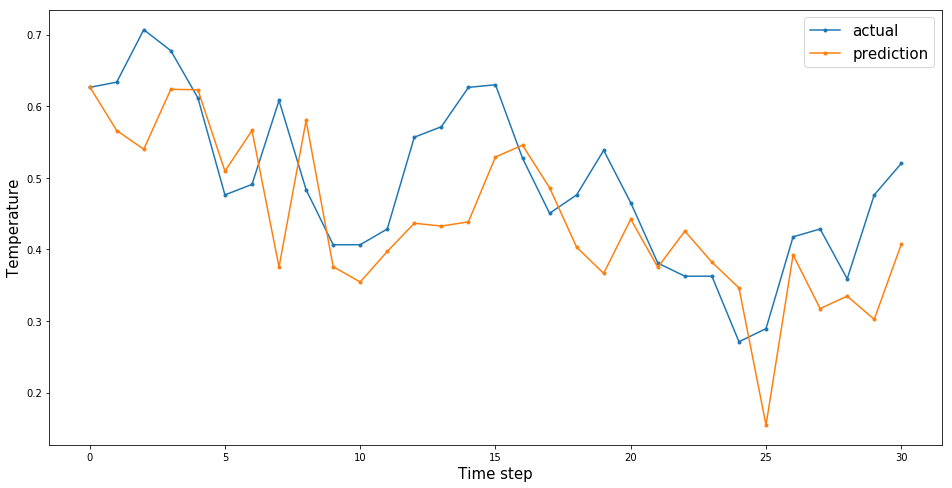

In [37]:
import matplotlib.pyplot as plt
len = 31
aa = [x for x in range(len)]
plt.figure(figsize = (16, 8))
plt.plot(aa, test_y[:31,4], marker='.', label="actual")
plt.plot(aa, yhat[:31,4],marker = '.', label="prediction")
plt.ylabel('Temperature', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

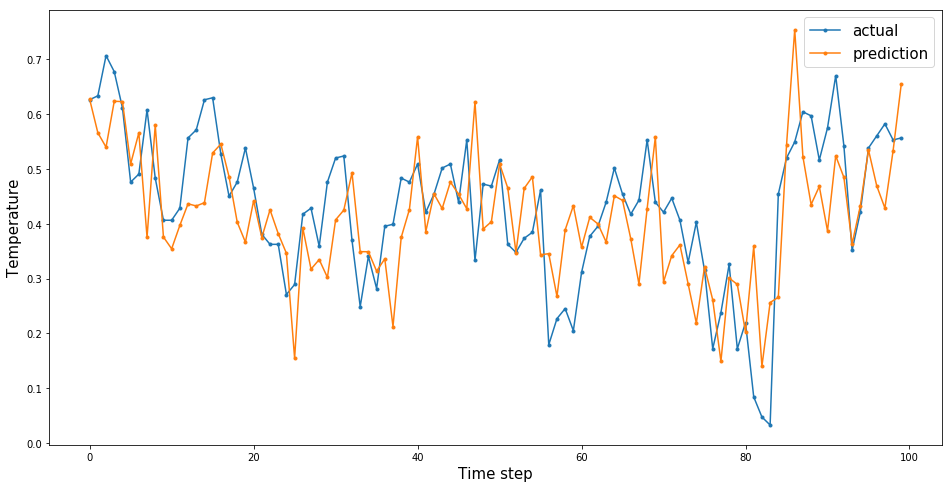

In [42]:
import matplotlib.pyplot as plt
len = 100
aa = [x for x in range(len)]
plt.figure(figsize = (16, 8))
plt.plot(aa, test_y[:100,4], marker='.', label="actual")
plt.plot(aa, yhat[:100,4],marker = '.', label="prediction")
plt.ylabel('Temperature', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [99]:
da.head()

spring  summer  fall  winter  StnPres StnPresMax StnPresMin  \
dt                                                                        
2012-01-01       0       0     0       1   1017.9     1020.5     1015.8   
2012-01-02       0       0     0       1   1017.1     1018.7     1016.1   
2012-01-03       0       0     0       1   1017.0     1018.6     1015.2   
2012-01-04       0       0     0       1   1020.1     1022.8     1018.3   
2012-01-05       0       0     0       1   1019.3     1022.1     1017.3   

            Temperature T Max T Min       ...        Temperature(t-1)(t-1)  \
dt                                        ...                                
2012-01-01         16.7  19.9  14.4       ...                          NaN   
2012-01-02         16.4  19.4  14.6       ...                          NaN   
2012-01-03         16.8  22.7  13.1       ...                         16.7   
2012-01-04         12.1  15.2  10.9       ...                         16.4   
2012-01-05         12.7  14.7  11.0       ...                         16.8   

           T Max(t-1)(t-1)  T Min(t-1)(t-1)  RH(t-1)(t-1) RHMin(t-1)(t-1)  \
dt                                                                          
2012-01-01             NaN              NaN           NaN             NaN   
2012-01-02             NaN              NaN           NaN             NaN   
2012-01-03            19.9             14.4            71              60   
2012-01-04            19.4             14.6            68              54   
2012-01-05            22.7             13.1            78              60   

           WS(t-1)(t-1)  WD(t-1)(t-1)  WSGust(t-1)(t-1)  WDGust(t-1)(t-1)  \
dt                                                                          
2012-01-01          NaN           NaN               NaN               NaN   
2012-01-02          NaN           NaN               NaN               NaN   
2012-01-03          4.9          44.0              13.9                48   
2012-01-04          3.7          41.0               8.4                46   
2012-01-05          2.9          41.0              10.7                45   

            Precp(t-1)(t-1)  
dt                           
2012-01-01              NaN  
2012-01-02              NaN  
2012-01-03              0.0  
2012-01-04              0.0  
2012-01-05              0.0  

[5 rows x 969 columns]

In [100]:
da.drop(df.columns[[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16]], axis = 1, inplace= True)
da.head()

Temperature  spring(t-7)  summer(t-7)  fall(t-7)  winter(t-7)  \
dt                                                                          
2012-01-01         16.7          NaN          NaN        NaN          NaN   
2012-01-02         16.4          NaN          NaN        NaN          NaN   
2012-01-03         16.8          NaN          NaN        NaN          NaN   
2012-01-04         12.1          NaN          NaN        NaN          NaN   
2012-01-05         12.7          NaN          NaN        NaN          NaN   

            StnPres(t-7) StnPresMax(t-7) StnPresMin(t-7)  Temperature(t-7)  \
dt                                                                           
2012-01-01           NaN             NaN             NaN               NaN   
2012-01-02           NaN             NaN             NaN               NaN   
2012-01-03           NaN             NaN             NaN               NaN   
2012-01-04           NaN             NaN             NaN               NaN   
2012-01-05           NaN             NaN             NaN               NaN   

           T Max(t-7)       ...        Temperature(t-1)(t-1) T Max(t-1)(t-1)  \
dt                          ...                                                
2012-01-01        NaN       ...                          NaN             NaN   
2012-01-02        NaN       ...                          NaN             NaN   
2012-01-03        NaN       ...                         16.7            19.9   
2012-01-04        NaN       ...                         16.4            19.4   
2012-01-05        NaN       ...                         16.8            22.7   

           T Min(t-1)(t-1)  RH(t-1)(t-1)  RHMin(t-1)(t-1) WS(t-1)(t-1)  \
dt                                                                       
2012-01-01             NaN           NaN              NaN          NaN   
2012-01-02             NaN           NaN              NaN          NaN   
2012-01-03            14.4            71               60          4.9   
2012-01-04            14.6            68               54          3.7   
2012-01-05            13.1            78               60          2.9   

           WD(t-1)(t-1)  WSGust(t-1)(t-1)  WDGust(t-1)(t-1)  Precp(t-1)(t-1)  
dt                                                                            
2012-01-01          NaN               NaN               NaN              NaN  
2012-01-02          NaN               NaN               NaN              NaN  
2012-01-03         44.0              13.9                48              0.0  
2012-01-04         41.0               8.4                46              0.0  
2012-01-05         41.0              10.7                45              0.0  

[5 rows x 953 columns]

In [102]:
da.dropna(
    axis=0,     
    how='any',   
    inplace=True)

da.head()

Temperature  spring(t-7)  summer(t-7)  fall(t-7)  winter(t-7)  \
dt                                                                          
2012-01-15         18.0          0.0          0.0        0.0          1.0   
2012-01-16         16.2          0.0          0.0        0.0          1.0   
2012-01-17         17.4          0.0          0.0        0.0          1.0   
2012-01-18         18.3          0.0          0.0        0.0          1.0   
2012-01-19         18.5          0.0          0.0        0.0          1.0   

            StnPres(t-7) StnPresMax(t-7) StnPresMin(t-7)  Temperature(t-7)  \
dt                                                                           
2012-01-15        1019.6          1021.5          1017.7              17.6   
2012-01-16        1018.4          1020.3          1016.2              17.8   
2012-01-17        1018.0          1019.5          1016.1              18.2   
2012-01-18        1019.7          1021.4          1018.4              16.9   
2012-01-19        1018.7          1020.8          1016.5              17.4   

           T Max(t-7)       ...        Temperature(t-1)(t-1) T Max(t-1)(t-1)  \
dt                          ...                                                
2012-01-15       18.7       ...                         18.5            20.4   
2012-01-16       20.3       ...                         18.1            19.9   
2012-01-17       20.9       ...                         18.0            20.2   
2012-01-18       19.3       ...                         16.2            18.9   
2012-01-19       20.1       ...                         17.4            21.3   

           T Min(t-1)(t-1)  RH(t-1)(t-1)  RHMin(t-1)(t-1) WS(t-1)(t-1)  \
dt                                                                       
2012-01-15            17.1            89               82          2.2   
2012-01-16            16.8            97               93          2.0   
2012-01-17            16.0            95               87          2.9   
2012-01-18            14.7            91               80          3.5   
2012-01-19            14.7            84               65          2.8   

           WD(t-1)(t-1)  WSGust(t-1)(t-1)  WDGust(t-1)(t-1)  Precp(t-1)(t-1)  
dt                                                                            
2012-01-15         20.0               5.8                20              0.0  
2012-01-16          1.0               5.3                21              0.5  
2012-01-17         40.0               9.1                 5              4.5  
2012-01-18         41.0               9.7                75             13.0  
2012-01-19         46.0               8.2                 2              0.0  

[5 rows x 953 columns]

In [ ]:
import numpy as np
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
values = min_max_scaler.fit_transform(da.values)


#values = df.values
train = values[:2079, :]
test = values [2079:, :]

train_X, train_y = train[:, 1:], train[:,0]
test_X, test_y = test[:, 1:], test[:,0]

print(train.shape,test.shape)

train_X = np.resize(train_X,(train_X.shape[0], 7, 17))
#train_y = np.resize(train_y,(train_y.shape[0], 13))
test_X = np.resize(test_X,(test_X.shape[0], 7, 17))
#test_y = np.resize(test_y,(test_y.shape[0], 3, 13))
print ('Train_X Shape: ',train_X.shape)
print ('Train_y Shape: ',train_y.shape)
print ('Test_X Shape: ',test_X.shape)
print ('Test_y Shape: ',test_y.shape)

In [110]:
train_X = train_X.astype('float32')      #change type train_X and train_y
train_y = train_y.astype('float32')

In [111]:
import keras
from keras.layers import Dense, LSTM, TimeDistributed , Dropout,Masking
from keras.models import Sequential
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(units=128, input_shape=(7,17),return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               74752     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [113]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1000, verbose=1)
history = model.fit(train_X, train_y, epochs=1000000, batch_size=24,validation_split = 0.25,verbose=1, callbacks=[early_stopping])

Train on 1559 samples, validate on 520 samples
Epoch 1/1000000
1559/1559 [==============================] - 1s 637us/step - loss: 0.0211 - acc: 0.0013 - val_loss: 0.1132 - val_acc: 0.0000e+00
Epoch 2/1000000
1559/1559 [==============================] - 1s 716us/step - loss: 0.0210 - acc: 0.0013 - val_loss: 0.1273 - val_acc: 0.0000e+00
Epoch 3/1000000
1559/1559 [==============================] - 1s 545us/step - loss: 0.0209 - acc: 6.4144e-04 - val_loss: 0.1162 - val_acc: 0.0000e+00
Epoch 4/1000000
1559/1559 [==============================] - 1s 527us/step - loss: 0.0196 - acc: 0.0013 - val_loss: 0.1334 - val_acc: 0.0000e+00
Epoch 5/1000000
1559/1559 [==============================] - 1s 525us/step - loss: 0.0205 - acc: 0.0013 - val_loss: 0.1203 - val_acc: 0.0000e+00
Epoch 6/1000000
1559/1559 [==============================] - 1s 535us/step - loss: 0.0196 - acc: 0.0013 - val_loss: 0.1283 - val_acc: 0.0000e+00
Epoch 7/1000000
1559/1559 [==============================] - 1s 544us/step - lo

1559/1559 [==============================] - 1s 517us/step - loss: 0.0121 - acc: 0.0013 - val_loss: 0.0989 - val_acc: 0.0000e+00
Epoch 113/1000000
1559/1559 [==============================] - 1s 679us/step - loss: 0.0123 - acc: 0.0013 - val_loss: 0.0963 - val_acc: 0.0000e+00
Epoch 114/1000000
1559/1559 [==============================] - 1s 555us/step - loss: 0.0123 - acc: 0.0013 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 115/1000000
1559/1559 [==============================] - 1s 501us/step - loss: 0.0123 - acc: 0.0013 - val_loss: 0.1010 - val_acc: 0.0000e+00
Epoch 116/1000000
1559/1559 [==============================] - 1s 495us/step - loss: 0.0119 - acc: 0.0013 - val_loss: 0.0875 - val_acc: 0.0000e+00
Epoch 117/1000000
1559/1559 [==============================] - 1s 493us/step - loss: 0.0118 - acc: 0.0013 - val_loss: 0.0910 - val_acc: 0.0000e+00
Epoch 118/1000000
1559/1559 [==============================] - 1s 519us/step - loss: 0.0129 - acc: 0.0013 - val_loss: 0.1004 - val_acc: 

Epoch 168/1000000
1559/1559 [==============================] - 1s 575us/step - loss: 0.0111 - acc: 0.0013 - val_loss: 0.0899 - val_acc: 0.0000e+00
Epoch 169/1000000
1559/1559 [==============================] - 1s 500us/step - loss: 0.0111 - acc: 0.0013 - val_loss: 0.0955 - val_acc: 0.0000e+00
Epoch 170/1000000
1559/1559 [==============================] - 1s 542us/step - loss: 0.0115 - acc: 0.0013 - val_loss: 0.0926 - val_acc: 0.0000e+00
Epoch 171/1000000
1559/1559 [==============================] - 1s 526us/step - loss: 0.0111 - acc: 0.0013 - val_loss: 0.0828 - val_acc: 0.0000e+00
Epoch 172/1000000
1559/1559 [==============================] - 1s 497us/step - loss: 0.0111 - acc: 0.0013 - val_loss: 0.1033 - val_acc: 0.0000e+00
Epoch 173/1000000
1559/1559 [==============================] - 1s 494us/step - loss: 0.0113 - acc: 0.0013 - val_loss: 0.0901 - val_acc: 0.0000e+00
Epoch 174/1000000
1559/1559 [==============================] - 1s 703us/step - loss: 0.0111 - acc: 0.0013 - val_loss: 

1559/1559 [==============================] - 1s 950us/step - loss: 0.0107 - acc: 0.0013 - val_loss: 0.0965 - val_acc: 0.0000e+00
Epoch 279/1000000
1559/1559 [==============================] - ETA: 0s - loss: 0.0106 - acc: 0.001 - 1s 772us/step - loss: 0.0108 - acc: 0.0013 - val_loss: 0.0893 - val_acc: 0.0000e+00
Epoch 280/1000000
1559/1559 [==============================] - 1s 688us/step - loss: 0.0107 - acc: 0.0013 - val_loss: 0.0936 - val_acc: 0.0000e+00
Epoch 281/1000000
1559/1559 [==============================] - 1s 685us/step - loss: 0.0104 - acc: 0.0013 - val_loss: 0.0980 - val_acc: 0.0000e+00
Epoch 282/1000000
1559/1559 [==============================] - 1s 687us/step - loss: 0.0106 - acc: 0.0013 - val_loss: 0.0985 - val_acc: 0.0000e+00
Epoch 283/1000000
1559/1559 [==============================] - 1s 679us/step - loss: 0.0107 - acc: 0.0013 - val_loss: 0.1054 - val_acc: 0.0000e+00
Epoch 284/1000000
1559/1559 [==============================] - 1s 801us/step - loss: 0.0106 - acc:

KeyboardInterrupt: 